In [1]:
## load the packages here

import numpy as np
import pandas as pd
import csv
import re

## Download your data and load them into the Python.
You can find them [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing).

- Features and response variables are in different files
- be careful about number of spaces between the values in the file

In [2]:
# little help from us
results = []
with open('./Smartphone Sensor Data/train/X_train.txt') as inputfile:
    for row in csv.reader(inputfile):
        results.append([float(i) for i in re.sub("\s+",",",row[0].strip()).split(",")])

In [3]:
X_train = pd.DataFrame(results)

In [4]:
X_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.267383,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417


In [5]:
X_train.shape

(7352, 561)

In [6]:
X_train.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
556    float64
557    float64
558    float64
559    float64
560    float64
Length: 561, dtype: object

In [7]:
results2 = []
with open('./Smartphone Sensor Data/train/y_train.txt') as inputfile:
    for row in csv.reader(inputfile):
        results2.append(int(row[0]))

In [8]:
y = pd.Series(results2)

In [9]:
y

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Length: 7352, dtype: int64

In [10]:
y.head(10)

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
dtype: int64

In [11]:
y.shape

(7352,)

In [12]:
y.dtypes

dtype('int64')

## Task 1: Create Binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent binary variable indicating if person is walking or not

In [13]:
y_train = y.replace({2: 1, 3: 1, 4: 0, 5: 0, 6: 0})

In [14]:
y_train.value_counts()

0    4067
1    3285
dtype: int64

## Task 2

+ Create Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y
+ Compare the results of Logistic regressions from different Python packages (sklearn, statsmodel)
+ Plot the FIT of predicted probabilities to the original values

Note that since the dataframe columns are indexed from 0 to 560, then feature
number 54 corresponds to column number 53. 

In [15]:
X_train1 = X_train[53].to_frame()

X_train1.shape

(7352, 1)

In [16]:
X_train1.describe()

,53
count,7352.000000
mean,0.023248
std,0.369737
min,-0.568157
25%,-0.225444
50%,-0.129279
75%,0.140694
max,1.000000


In [17]:
X_train1.head(10)

,53
0,-0.123213
1,-0.114893
2,-0.114893
3,-0.121336
4,-0.121834
5,-0.121834
6,-0.120092
7,-0.128559
8,-0.129764
9,-0.129764


1) First, we will use sklearn to create the logistic regression model.

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()


In [19]:
# fit the model with data
logreg.fit(X_train1, y_train)

LogisticRegression()

In [20]:
logreg.classes_

array([0, 1])

In [21]:
logreg.coef_

array([[-7.26026603]])

In [22]:
logreg.intercept_

array([-0.81110917])

In [23]:
logreg.n_iter_

array([10], dtype=int32)

In [24]:
y_pred1 = logreg.predict(X_train1)

In [25]:
y_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_pred1)
cnf_matrix

array([[2889, 1178],
       [ 560, 2725]])

In [27]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred1))

Accuracy: 0.7636017410228509


In [28]:
print("Precision:",metrics.precision_score(y_train, y_pred1))

Precision: 0.6981808864975659


In [29]:
print("Recall:",metrics.recall_score(y_train, y_pred1))

Recall: 0.8295281582952816


In [30]:
y_pred_proba1 = logreg.predict_proba(X_train1)[::,1]
y_pred_proba1

array([0.52085114, 0.50576151, 0.50576151, ..., 0.68073213, 0.67205298,
       0.67461775])

In [31]:
auc = metrics.roc_auc_score(y_train, y_pred_proba1)
auc

0.8410229118879768

2) Now, we will use statsmodel to create the logistic regression model.

In [32]:
X_train2 = X_train1.copy()

In [33]:
import statsmodels.api as sm

In [34]:
X_train2 = sm.add_constant(X_train2) # adding a constant
X_train2.head(10)

,const,53
0,1.0,-0.123213
1,1.0,-0.114893
2,1.0,-0.114893
3,1.0,-0.121336
4,1.0,-0.121834
5,1.0,-0.121834
6,1.0,-0.120092
7,1.0,-0.128559
8,1.0,-0.129764
9,1.0,-0.129764


In [35]:
log_reg2 = sm.Logit(y_train, X_train2)

In [36]:
model = log_reg2.fit()

Optimization terminated successfully.
         Current function value: 0.460220
         Iterations 8


In [37]:
print_model = model.summary()
print(print_model)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7352
Model:                          Logit   Df Residuals:                     7350
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:                  0.3306
Time:                        12:46:33   Log-Likelihood:                -3383.5
converged:                       True   LL-Null:                       -5054.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8621      0.044    -19.534      0.000      -0.949      -0.776
53            -7.6125      0.225    -33.829      0.000      -8.054      -7.171


Note that the coefficients of the 2 models are different.

In [38]:
y_pred_proba2 = model.predict(X_train2)
y_pred_proba2

0       0.518950
1       0.503125
2       0.503125
3       0.515381
4       0.516327
          ...   
7347    0.716425
7348    0.716425
7349    0.686154
7350    0.677132
7351    0.679800
Length: 7352, dtype: float64

In [39]:
y_pred_proba2_np = y_pred_proba2.to_numpy()

In [40]:
np.array_equal(y_pred_proba1, y_pred_proba2_np)

False

Note that the predicted probabilities from the 2 models are different.

In [41]:
y_pred2 = (y_pred_proba2_np >= 0.5).astype(int)
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
np.array_equal(y_pred1, y_pred2)

False

In [43]:
# We will compute the number of unequal elements from both arrays.
np.count_nonzero(y_pred1 != y_pred2)

21

Note that the predicted classes from the 2 models are different.

In [44]:
cnf_matrix2 = metrics.confusion_matrix(y_train, y_pred2)
cnf_matrix2

array([[2894, 1173],
       [ 576, 2709]])

In [45]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred2))

Accuracy: 0.7621055495103374


In [46]:
print("Precision:",metrics.precision_score(y_train, y_pred2))

Precision: 0.6978361669242659


In [47]:
print("Recall:",metrics.recall_score(y_train, y_pred2))

Recall: 0.8246575342465754


In [48]:
auc = metrics.roc_auc_score(y_train, y_pred_proba2_np)
auc

0.8410229118879768

Note that the metrics for the 2 models are pretty similar.

I asked Socorro for assistance at 1 PM on January 11, 2021.  
She said that the 2 models are similar but not the same because they use different solvers.

3) Now, we will plot the FIT of predicted probabilities to the original values.

In [49]:
# import matplotlib
import matplotlib.pyplot as plt

In [50]:
# set figure size
plt.rcParams["figure.figsize"] = (12, 8)

First, we will do the plot for the sklearn model.

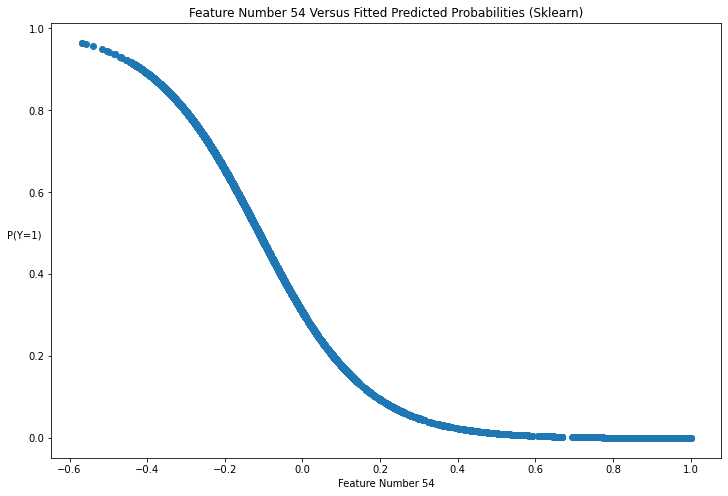

In [51]:
plt.scatter(X_train1, y_pred_proba1)
plt.title("Feature Number 54 Versus Fitted Predicted Probabilities (Sklearn)")
plt.xlabel("Feature Number 54")
plt.ylabel("P(Y=1)", rotation=0)
plt.show()

Now, we will do the plot for the statsmodel model.

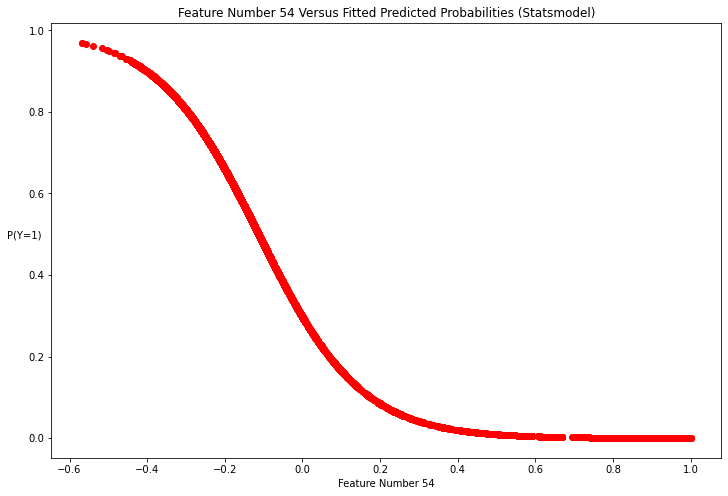

In [52]:
plt.scatter(X_train1, y_pred_proba2, c='r')
plt.title("Feature Number 54 Versus Fitted Predicted Probabilities (Statsmodel)")
plt.xlabel("Feature Number 54")
plt.ylabel("P(Y=1)", rotation=0)
plt.show()

From the plots, the predicted probabilties look similar.

This is extra.  We are just doing alternate plots.

In [53]:
df = pd.DataFrame({"Feature 54": X_train[53], "Sklearn": y_pred_proba1, "Statsmodels": y_pred_proba2})
df.head(10)

,Feature 54,Sklearn,Statsmodels
0,-0.123213,0.520851,0.518950
1,-0.114893,0.505762,0.503125
2,-0.114893,0.505762,0.503125
3,-0.121336,0.517448,0.515381
4,-0.121834,0.518350,0.516327
5,-0.121834,0.518350,0.516327
6,-0.120092,0.515194,0.513016
7,-0.128559,0.530527,0.529099
8,-0.129764,0.532706,0.531384
9,-0.129764,0.532706,0.531384


In [54]:
df.sort_values(by = "Feature 54", inplace = True)
df.head(10)

,Feature 54,Sklearn,Statsmodels
5141,-0.568157,0.964901,0.969615
5140,-0.568157,0.964901,0.969615
5139,-0.557830,0.962272,0.967211
3130,-0.539622,0.957168,0.962519
3444,-0.517173,0.949965,0.955843
5352,-0.502745,0.944745,0.950968
5351,-0.502745,0.944745,0.950968
5142,-0.497643,0.942779,0.949125
4199,-0.485275,0.937738,0.944381
3150,-0.482211,0.936426,0.943143


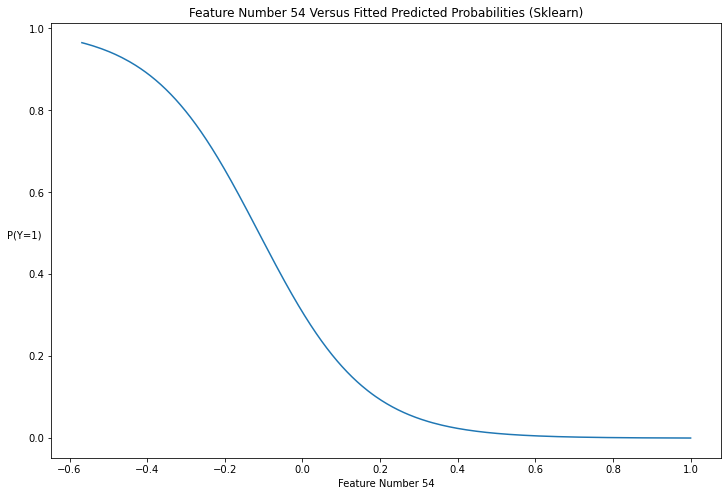

In [55]:
plt.plot(df["Feature 54"], df["Sklearn"])
plt.title("Feature Number 54 Versus Fitted Predicted Probabilities (Sklearn)")
plt.xlabel("Feature Number 54")
plt.ylabel("P(Y=1)", rotation=0)
plt.show()

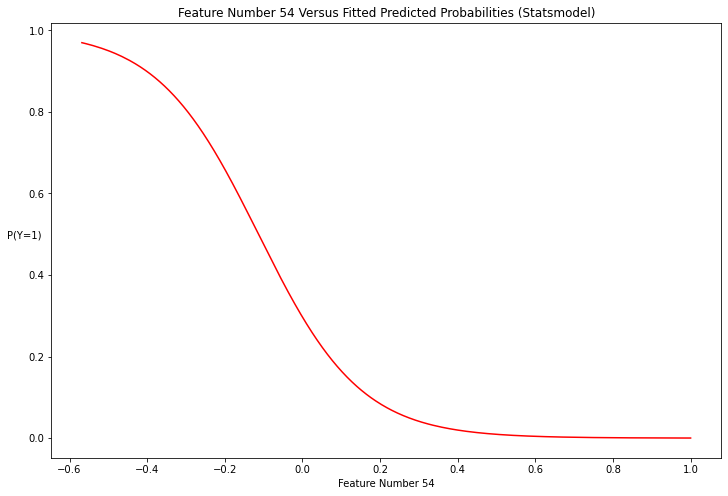

In [56]:
plt.plot(df["Feature 54"], df["Statsmodels"], c='r')
plt.title("Feature Number 54 Versus Fitted Predicted Probabilities (Statsmodel)")
plt.xlabel("Feature Number 54")
plt.ylabel("P(Y=1)", rotation=0)
plt.show()

## Task 3
- Try to fit Binary Logistic Regression with all the features? How many are significant?

In [57]:
X_train3  = X_train.copy()

In [58]:
X_train3.shape

(7352, 561)

In [59]:
y_train.shape

(7352,)

In [60]:
"""X_train3 = sm.add_constant(X_train3) # adding a constant
X_train3.head(10)

log_reg_all = sm.Logit(y_train, X_train3)
model_all = log_reg_all.fit()"""


'X_train3 = sm.add_constant(X_train3) # adding a constant\nX_train3.head(10)\n\nlog_reg_all = sm.Logit(y_train, X_train3)\nmodel_all = log_reg_all.fit()'

I tried to use statsmodels to create the model but the solver for the model did not converge to a solution.

This did not work.  I will need to ask for help.

Later at 2:27 PM, Socorro contacted me on Slack.  She said the following.

Ryan, it looks like this is not your fault.
Try using sklearn instead of statsmodel
It is a problem with statsmodel when you have too many features.

Then I asked her the following.

How do you get the p-values in Sklearn to determine which features are signifcant?

Her response is below.

you would need to get the parameters using
params = np.append(lm.intercept_,lm.coef_)

then get the predictions using predict and then use the MSE

I found a post on that on stack overflow

you can try checking it out

https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

Now, we will use sklearn instead of statsmodels.

In [61]:
# instantiate the model (using the default parameters)
logreg_all = LogisticRegression()


In [62]:
# fit the model with data
logreg_all.fit(X_train3, y_train)

LogisticRegression()

In [63]:
logreg_all.classes_

array([0, 1])

In [64]:
logreg_all.coef_

array([[ 1.59798107e-01,  3.44771022e-02, -1.17903905e-02,
         2.97922359e-01,  1.52122082e-01,  9.76897267e-02,
         2.77635233e-01,  1.50808997e-01,  8.76953845e-02,
         5.06403948e-01,  9.80267589e-02,  3.83490413e-02,
        -4.70810566e-02, -8.00759912e-02, -5.38816069e-02,
         1.81754239e-01,  6.12056194e-02, -4.21376422e-02,
        -8.20315387e-02,  2.28579505e-01,  1.10570142e-01,
         9.05596295e-02,  2.85933530e-01,  2.08686689e-01,
         7.35814807e-03, -1.72466972e-01,  1.16581504e-02,
        -6.95416897e-03,  9.50162318e-02, -8.11371580e-02,
         7.14996605e-02, -4.48141608e-02,  8.14858095e-02,
        -1.87520989e-01,  1.68446522e-01, -8.29417930e-02,
        -1.06068562e-02, -2.22819165e-01,  8.05112265e-02,
        -1.75676848e-01,  3.14064205e-01, -2.89356498e-01,
        -9.05914237e-02, -2.19037917e-01, -1.58157942e-01,
        -2.18363690e-01, -2.14469585e-01, -1.51631025e-01,
        -2.15739200e-01,  2.29432224e-01, -3.14681916e-0

In [65]:
logreg_all.intercept_

array([10.30774672])

In [66]:
logreg_all.n_iter_

array([90], dtype=int32)

We will use the code from the website Socorro recommended.

In [67]:
"""X = X_train.copy()
y1 = y_train

from scipy import stats

params = np.append(logreg_all2.intercept_,logreg_all2.coef_)
predictions = logreg_all2.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y1-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p-values"] = [params,sd_b,ts_b,p_values]
print(myDF3)

"""

'X = X_train.copy()\ny1 = y_train\n\nfrom scipy import stats\n\nparams = np.append(logreg_all2.intercept_,logreg_all2.coef_)\npredictions = logreg_all2.predict(X)\n\nnewX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))\nMSE = (sum((y1-predictions)**2))/(len(newX)-len(newX.columns))\n\n# Note if you don\'t want to use a DataFrame replace the two lines above with\n# newX = np.append(np.ones((len(X),1)), X, axis=1)\n# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))\n\nvar_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())\nsd_b = np.sqrt(var_b)\nts_b = params/ sd_b\n\np_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]\n\nsd_b = np.round(sd_b,3)\nts_b = np.round(ts_b,3)\np_values = np.round(p_values,3)\nparams = np.round(params,4)\n\nmyDF3 = pd.DataFrame()\nmyDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p-values"] = [params,sd_b,ts_b,p_values]\nprint(myDF3)\n\n'

The above code does not work because y1 and predictions are equal which causes MSE to be 0.

Later at 3:30 PM, I spoke to the mentor Arshad Ahmed. He suggested that instead of using p-values, then use the absolute values of the coefficients to find the significant features.  The higher the absolute value of the coefficient, then the more significant it is.  He referred me to the following website https://stackoverflow.com/questions/24255723/sklearn-logistic-regression-important-features.

He then went through the problem with me.

I will go over it tomorrow.

In [68]:
"""feature_importance = abs(logreg_all2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show() """



"feature_importance = abs(logreg_all2.coef_[0])\nfeature_importance = 100.0 * (feature_importance / feature_importance.max())\nsorted_idx = np.argsort(feature_importance)\npos = np.arange(sorted_idx.shape[0]) + .5\n\nfeatfig = plt.figure()\nfeatax = featfig.add_subplot(1, 1, 1)\nfeatax.barh(pos, feature_importance[sorted_idx], align='center')\nfeatax.set_yticks(pos)\nfeatax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)\nfeatax.set_xlabel('Relative Feature Importance')\n\nplt.tight_layout()   \nplt.show() "

The above cell contains code from the website Arshad recommended.

Below is how he went through thr problem with me.

In [69]:
""""sorted_index = np.argsort(logreg_all2.coef_[0])[::-1]

X

features = np.array(X.columns)
features
features[sorted_index]
sorted_index_asc = np.argsort(logreg_all2.coef_[0])
sorted_index_asc

logreg_all2.coef_[0]
features[sorted_index_asc]

thresh = 0.1
np.count_nonzero(logreg_all2.coef_[0] > thresh)
features[logreg_all2.coef_[0] > thresh]
important_features_above_thresh_desc = np.argsort(logreg_all2.coef_[0])[::-1]
important_features_above_thresh_desc
features[important_features_above_thresh_desc]
"""

'"sorted_index = np.argsort(logreg_all2.coef_[0])[::-1]\n\nX\n\nfeatures = np.array(X.columns)\nfeatures\nfeatures[sorted_index]\nsorted_index_asc = np.argsort(logreg_all2.coef_[0])\nsorted_index_asc\n\nlogreg_all2.coef_[0]\nfeatures[sorted_index_asc]\n\nthresh = 0.1\nnp.count_nonzero(logreg_all2.coef_[0] > thresh)\nfeatures[logreg_all2.coef_[0] > thresh]\nimportant_features_above_thresh_desc = np.argsort(logreg_all2.coef_[0])[::-1]\nimportant_features_above_thresh_desc\nfeatures[important_features_above_thresh_desc]\n'

Note that there may be errors in the above code.  Here is the idea for the above code. 

First, we sort the coefficients in descending order of magnitude (absolute value).  
Then, we set an arbitrary positive value to be the threshold.  
Then the significant features are those whose magnitude are greater than threshold.
Arshad also wanted to show me how to get the list of siginicant features 
in order of importance.

He said that this method is usually used to find the significant features 
instead of using the p-values.

Later at 4:19 PM, the mentor Arshad Ahmed contacted me on Slack.  He provided further explanation.

Logistic Regression Feature Importance
- Sort logistic regression coefficients by their values and use the indexes from this sorted values to sort the columns of feature dataframe (i.e. X)



# Now, I will try to complete Task 3 using the above information.

In [70]:
logreg_all.coef_.shape

(1, 561)

In [73]:
coeffs = logreg_all.coef_[0]

In [74]:
coeffs2 = np.abs(coeffs)
coeffs2

array([1.59798107e-01, 3.44771022e-02, 1.17903905e-02, 2.97922359e-01,
       1.52122082e-01, 9.76897267e-02, 2.77635233e-01, 1.50808997e-01,
       8.76953845e-02, 5.06403948e-01, 9.80267589e-02, 3.83490413e-02,
       4.70810566e-02, 8.00759912e-02, 5.38816069e-02, 1.81754239e-01,
       6.12056194e-02, 4.21376422e-02, 8.20315387e-02, 2.28579505e-01,
       1.10570142e-01, 9.05596295e-02, 2.85933530e-01, 2.08686689e-01,
       7.35814807e-03, 1.72466972e-01, 1.16581504e-02, 6.95416897e-03,
       9.50162318e-02, 8.11371580e-02, 7.14996605e-02, 4.48141608e-02,
       8.14858095e-02, 1.87520989e-01, 1.68446522e-01, 8.29417930e-02,
       1.06068562e-02, 2.22819165e-01, 8.05112265e-02, 1.75676848e-01,
       3.14064205e-01, 2.89356498e-01, 9.05914237e-02, 2.19037917e-01,
       1.58157942e-01, 2.18363690e-01, 2.14469585e-01, 1.51631025e-01,
       2.15739200e-01, 2.29432224e-01, 3.14681916e-01, 1.39513465e-01,
       3.73445736e-01, 2.24114257e-01, 4.17486479e-02, 1.13073217e-01,
      

In [75]:
coeffs2.min()

0.0005414475406833947

In [76]:
coeffs2.max()

0.6620458290785912

In [77]:
# Note that np.argsort returns the indices that would sort the array in 
# increasing order and we want the indices that would sort the array in
# decreasing order.

sorted_index = np.argsort(coeffs2)[::-1]
sorted_index


array([ 63,   9, 366, 102,  56, 287, 159,  52, 514, 234, 104, 513, 369,
       271,  50,  40, 268, 103, 367,   3,  41,  22, 182,   6, 184, 140,
       368, 274, 456, 457, 510, 558, 158, 265, 289,  57, 139, 523, 288,
        92, 293,  99, 433, 350,  49,  19, 559, 427, 372, 144,  86,  53,
        37, 135,  78, 127,  61, 551, 280,  43,  45,  83, 100,  48, 239,
       244,  46, 347, 375,  23, 157, 344, 511, 296,  87, 119, 363, 353,
        59, 124, 243, 226, 231,  95,  68,  33, 260, 272, 179, 218, 213,
       205, 200,  15,  67, 359, 113, 447, 348, 183,  39, 284,  66, 505,
       455, 204, 217, 446,  25, 208, 221, 148,  34, 236, 235, 285,  89,
        65, 297,  84, 351, 145, 107,   0, 376,  44, 454, 181, 374,  79,
       515, 520, 126, 146, 105, 517, 233,   4,  47,   7, 207, 220, 228,
       354, 266, 522, 227, 430, 256, 269, 552, 118, 229,  58, 508, 345,
        60, 193,  51, 141, 373,  93, 106, 168, 230, 516, 444, 128, 431,
       425, 518, 154, 432, 424, 286, 301, 247, 194, 153, 445, 29

In [79]:
coeffs2[63] # This is just a check that we did the correct sort.

0.6620458290785912

In [80]:
features = np.array(X_train3.columns)
features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [81]:
thresh = 0.1

In [82]:
total = np.count_nonzero(coeffs2 > thresh)
total

212

In [83]:
print(f"The number of significant features is {total}.")

The number of significant features is 212.


The following is extra.  We will extract the list of signicant features in order of importance.

In [85]:
sorted_index2 = sorted_index[(coeffs2 > thresh)]
sorted_index2

array([ 63, 102,  56, 159,  52, 234,  40,   3,  41, 182,   6, 140, 265,
       289, 523,  92, 293,  99, 350,  49,  19, 559, 427, 372, 144,  86,
        53,  37, 135, 127,  61, 551, 280,  43,  45,  83,  48, 244,  46,
       347, 375,  59, 124,  95,  68, 260, 272, 179, 218, 200,  15, 359,
       183,  39, 284,  66, 505, 455, 204, 217, 446, 208, 236, 235, 297,
        84, 376,  44, 454, 181, 374, 520, 517,   7, 207, 220, 266, 522,
       227, 256,  58, 508,  60, 193,  51, 141, 516, 444, 431, 445, 186,
       166, 273, 114, 267, 125, 156, 503, 428, 185, 474, 352, 215, 202,
       346, 111,  10,   5, 553, 175, 257, 252,  28,  73, 355, 310,  42,
        21, 537, 314,  77,  94,  64,  32, 212, 557, 216, 482, 163, 214,
       201, 261, 123, 407, 459, 486, 393, 450, 512, 531, 132, 249, 317,
       453, 377, 440, 196, 192, 117,  97, 338, 429, 382, 406,  12, 404,
       417, 264, 383, 143, 259, 390,  17, 386,  54, 320, 342, 395, 149,
       538, 548, 521, 420, 496, 546, 151, 490, 497, 411, 136, 48

In [87]:
sig_features = features[sorted_index2]
sig_features

array([ 63, 102,  56, 159,  52, 234,  40,   3,  41, 182,   6, 140, 265,
       289, 523,  92, 293,  99, 350,  49,  19, 559, 427, 372, 144,  86,
        53,  37, 135, 127,  61, 551, 280,  43,  45,  83,  48, 244,  46,
       347, 375,  59, 124,  95,  68, 260, 272, 179, 218, 200,  15, 359,
       183,  39, 284,  66, 505, 455, 204, 217, 446, 208, 236, 235, 297,
        84, 376,  44, 454, 181, 374, 520, 517,   7, 207, 220, 266, 522,
       227, 256,  58, 508,  60, 193,  51, 141, 516, 444, 431, 445, 186,
       166, 273, 114, 267, 125, 156, 503, 428, 185, 474, 352, 215, 202,
       346, 111,  10,   5, 553, 175, 257, 252,  28,  73, 355, 310,  42,
        21, 537, 314,  77,  94,  64,  32, 212, 557, 216, 482, 163, 214,
       201, 261, 123, 407, 459, 486, 393, 450, 512, 531, 132, 249, 317,
       453, 377, 440, 196, 192, 117,  97, 338, 429, 382, 406,  12, 404,
       417, 264, 383, 143, 259, 390,  17, 386,  54, 320, 342, 395, 149,
       538, 548, 521, 420, 496, 546, 151, 490, 497, 411, 136, 48